<a href="https://colab.research.google.com/github/aepanfilov/shov/blob/main/Shov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Модуль для работы с Google Disk
drive.mount('/content/drive')
# использовать '\' для экранировани/я 'пробела' в пути
fname="/content/drive/MyDrive/ColabNotebooks/shov.zip"

In [ ]:
!ls drive/Shareddrives/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend
import pandas as pd

# Загрузка и распаковка фото

In [ ]:
# загрузка отдельного архива с сайта
# !wget http://f1065011.xsph.ru/shov/original/noshov.zip
# !wget http://f1065011.xsph.ru/shov/original/bok.zip
# !wget http://f1065011.xsph.ru/shov/original/centr.zip
# !wget http://f1065011.xsph.ru/shov/original/shov.zip
# !wget http://f1065011.xsph.ru/shov/noshov2.zip

In [ ]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
# data_dir = pathlib.Path(data_dir+'/flower_photos').with_suffix('')

In [ ]:
from google.colab import drive # Модуль для работы с Google Disk
drive.mount('/content/drive')
# использовать '\' для экранировани/я 'пробела' в пути
fname="/content/drive/MyDrive/ColabNotebooks/Shov/shov_foto.zip"

In [ ]:
# распаковка архива с фото в папку content/shov_foto/
!unzip $fname;

Archive:  /content/drive/MyDrive/ColabNotebooks/Shov/shov_foto.zip
replace shov_foto/bok/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace shov_foto/bok/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data_dir = pathlib.Path('/content/shov_foto').with_suffix('')
data_dir

PosixPath('/content/shov_foto')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'В датасете {image_count} изображений')

В датасете 4712 изображений


# Разделение фото на выборки

In [ ]:
batch_size = 32
img_height = 100
img_width = 100
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 3770 files for training.


In [ ]:
!ls $data_dir

bok  centr  noshov  shov


In [ ]:
batch_size = 32
img_height = 100
img_width = 100
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 3770 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bok', 'centr', 'noshov', 'shov']


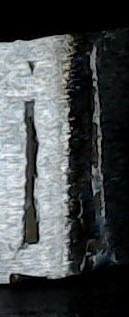

In [ ]:
selected_class = 'bok'
selected_imgs = list(data_dir.glob(f'{selected_class}/*'))
PIL.Image.open(str(selected_imgs[5]))

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 942 files for validation.


Просмотр примеров фото

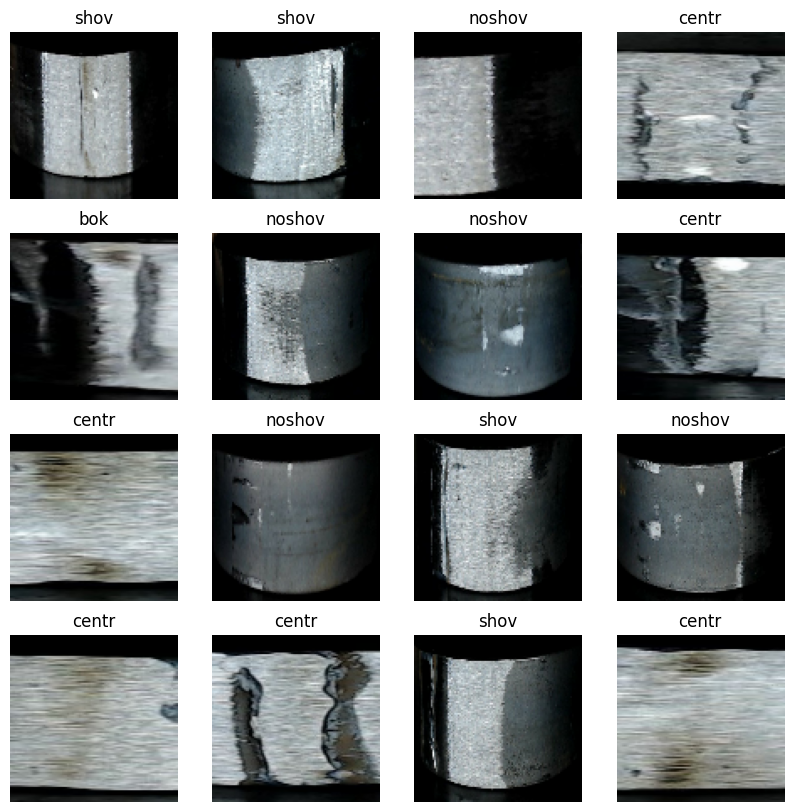

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(16):
		ax = plt.subplot(4, 4, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Задание нейронной сети

In [ ]:
num_classes = len(class_names)
backend.clear_session()
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,203,876 (4.59 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 401ms/step - accuracy: 0.8003 - loss: 0.4998 - val_accuracy: 0.9639 - val_loss: 0.1189
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 382ms/step - accuracy: 0.9554 - loss: 0.1272 - val_accuracy: 0.9703 - val_loss: 0.1030
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 379ms/step - accuracy: 0.9636 - loss: 0.1009 - val_accuracy: 0.9777 - val_loss: 0.0865
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9755 - loss: 0.0733 - val_accuracy: 0.9745 - val_loss: 0.0948
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 358ms/step - accuracy: 0.9787 - loss: 0.0547 - val_accuracy: 0.9830 - val_loss: 0.0753
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 87s 404ms/step - accuracy: 0.9810 - loss: 0.0556 - val_accuracy: 0.9660 - val_loss: 0.1113
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 78s 372ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9820 - val_loss: 0.0705
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 44s 374ms/step - accuracy: 0.9928 - loss: 0

Проверка работы НС

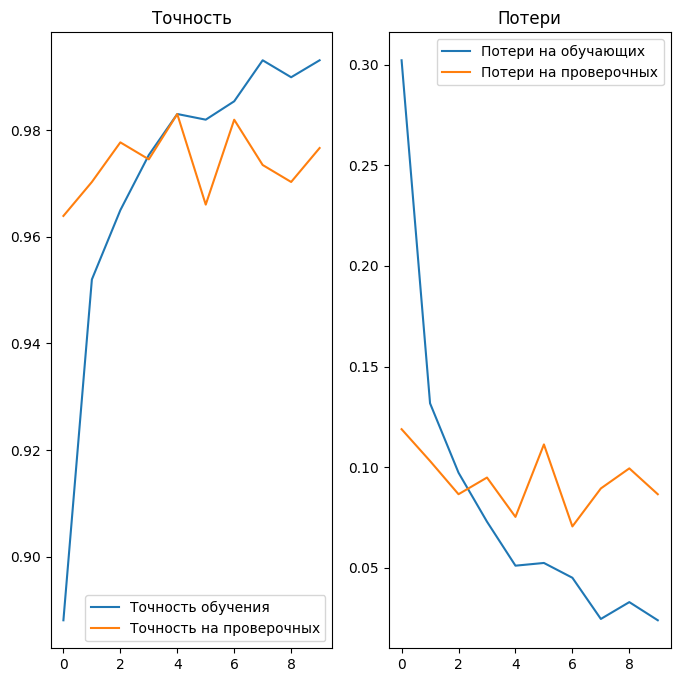

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность обучения')
plt.plot(epochs_range, val_acc, label='Точность на проверочных')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучающих')
plt.plot(epochs_range, val_loss, label='Потери на проверочных')
plt.legend(loc='upper right')
plt.title('Потери')
plt.show()

Проверка на проверочной выборке

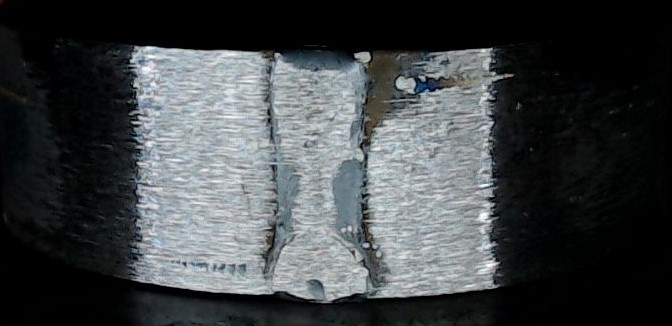

In [ ]:
selected_class = 'shov'
test_img = list(data_dir.glob(f'{selected_class}/*'))[35]
PIL.Image.open(str(test_img))

In [ ]:
img = tf.keras.utils.load_img(test_img, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("Изображение более всего наиболее напоминает класс {} с вероятностью {:.2f} %"
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Изображение более всего наиболее напоминает класс shov с вероятностью 100.00 %


In [ ]:
pd.DataFrame({'cls':class_names,'sc':score})

,cls,sc
0,bok,6.528032e-11
1,centr,2.638403e-11
2,noshov,2.761116e-05
3,shov,9.999723e-01


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)

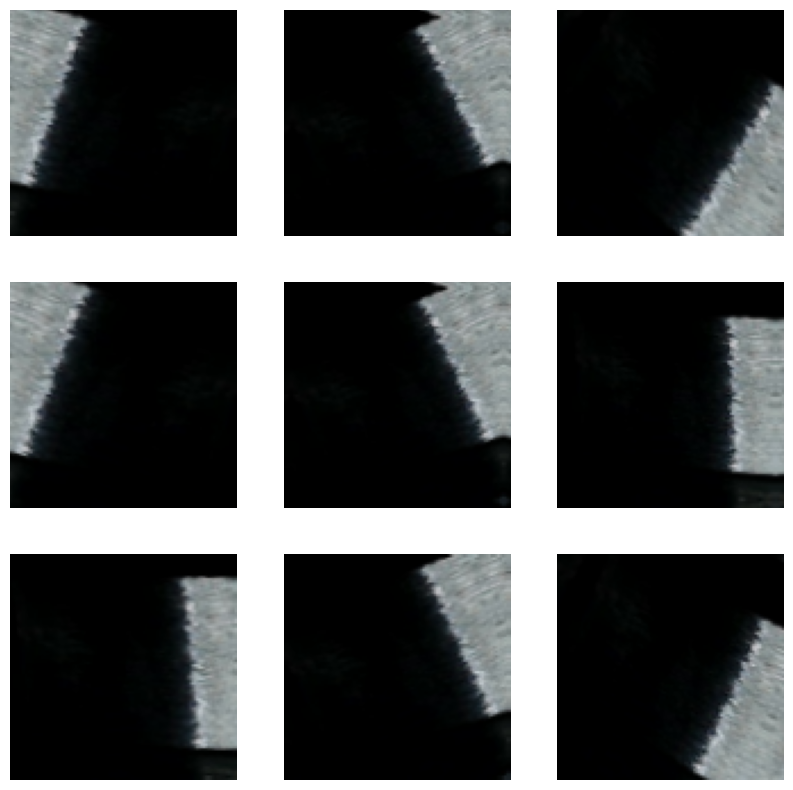

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
backend.clear_session()
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 453ms/step - accuracy: 0.7335 - loss: 0.6095 - val_accuracy: 0.9352 - val_loss: 0.2310
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 479ms/step - accuracy: 0.9246 - loss: 0.2186 - val_accuracy: 0.9544 - val_loss: 0.1101
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 76s 428ms/step - accuracy: 0.9457 - loss: 0.1472 - val_accuracy: 0.9512 - val_loss: 0.1466
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 416ms/step - accuracy: 0.9377 - loss: 0.1729 - val_accuracy: 0.9522 - val_loss: 0.1375
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 50s 421ms/step - accuracy: 0.9562 - loss: 0.1199 - val_accuracy: 0.9469 - val_loss: 0.1605
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 408ms/step - accuracy: 0.9536 - loss: 0.1172 - val_accuracy: 0.9342 - val_loss: 0.1887
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 432ms/step - accuracy: 0.9534 - loss: 0.1300 - val_accuracy: 0.9671 - val_loss: 0.0891
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 419ms/step - accuracy: 0.9586 - loss: 0

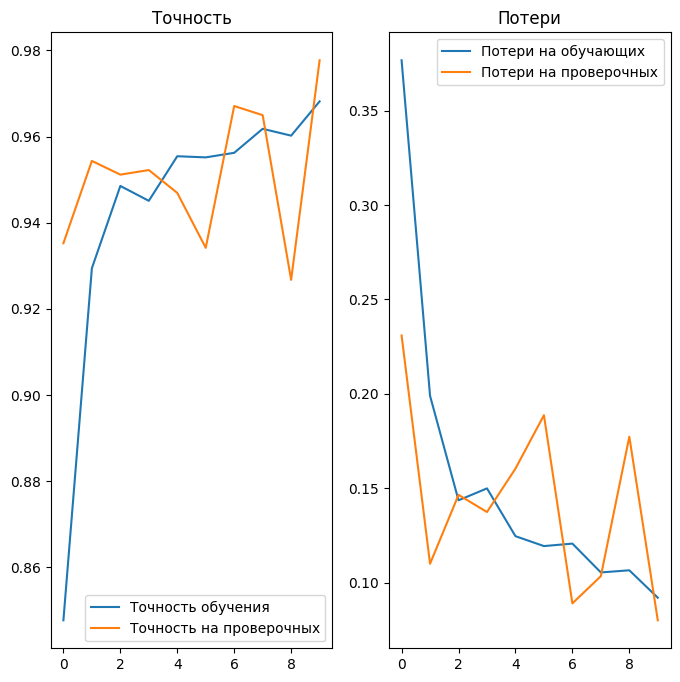

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность обучения')
plt.plot(epochs_range, val_acc, label='Точность на проверочных')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучающих')
plt.plot(epochs_range, val_loss, label='Потери на проверочных')
plt.legend(loc='upper right')
plt.title('Потери')
plt.show()

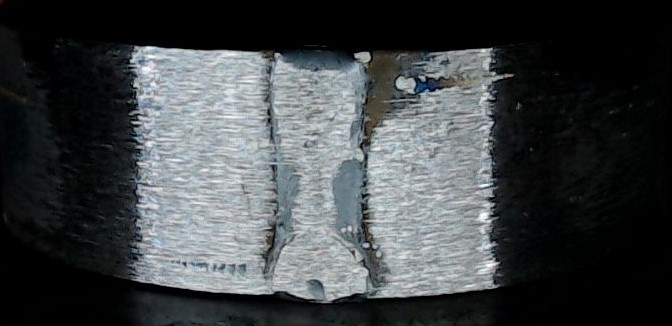

In [ ]:
PIL.Image.open(str(test_img))

Проверка модели

In [ ]:
# flower_url = "https://cdn.publish0x.com/prod/fs/images/62d4ff71f86ed2fb5182d6fffb5605a4be0335db4a866ee20eab2e21dd2bbfe8.jpg"
# flower_path = tf.keras.utils.get_file('flower', origin=flower_url,force_download=True)
# PIL.Image.open(str(flower_path))


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "Изображение более всего наиболее напоминает класс {} с вероятностью {:.2f} %"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Изображение более всего наиболее напоминает класс shov с вероятностью 99.99 %


In [ ]:
pd.DataFrame({'cls':class_names,'sc':score})

,cls,sc
0,bok,2.359786e-08
1,centr,1.545008e-06
2,noshov,1.118332e-04
3,shov,9.998866e-01


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import backend
import pandas as pd

# Загрузка и распаковка фото

In [ ]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
# data_dir = pathlib.Path(data_dir+'/flower_photos').with_suffix('')

In [ ]:
from google.colab import drive # Модуль для работы с Google Disk
drive.mount('/content/drive')
# использовать '\' для экранировани/я 'пробела' в пути
fname="/content/drive/MyDrive/ColabNotebooks/Shov/shov_foto.zip"

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# распаковка архива с фото в папку content/shov_foto/
!unzip $fname;

Archive:  /content/drive/MyDrive/ColabNotebooks/Shov/shov_foto.zip
replace shov_foto/bok/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace shov_foto/bok/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
data_dir = pathlib.Path('/content/shov_foto').with_suffix('')
data_dir

PosixPath('/content/shov_foto')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'В датасете {image_count} изображений')

В датасете 4712 изображений


# Разделение фото на выборки

In [ ]:
batch_size = 32
img_height = 100
img_width = 100
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 3770 files for training.


In [ ]:
!ls $data_dir

bok  centr  noshov  shov


In [ ]:
batch_size = 32
img_height = 100
img_width = 100
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 3770 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['bok', 'centr', 'noshov', 'shov']


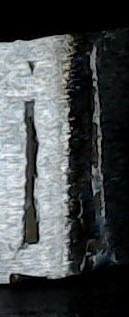

In [ ]:
selected_class = 'bok'
selected_imgs = list(data_dir.glob(f'{selected_class}/*'))
PIL.Image.open(str(selected_imgs[5]))

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4712 files belonging to 4 classes.
Using 942 files for validation.


Просмотр примеров фото

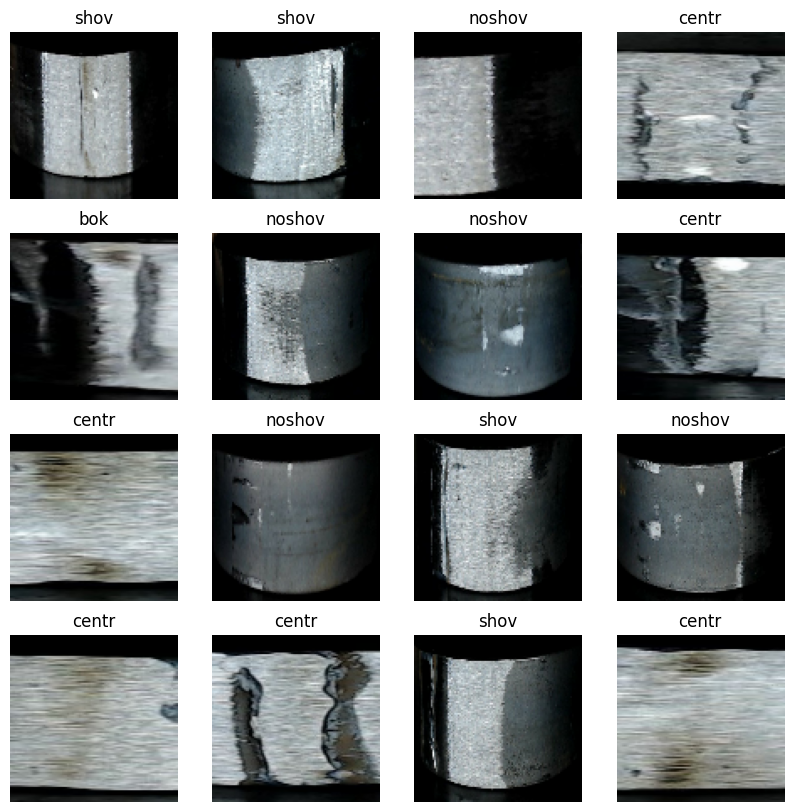

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(16):
		ax = plt.subplot(4, 4, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Задание нейронной сети

In [ ]:
num_classes = len(class_names)
backend.clear_session()
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,203,876 (4.59 MB)

 Trainable params: 1,203,876 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 401ms/step - accuracy: 0.8003 - loss: 0.4998 - val_accuracy: 0.9639 - val_loss: 0.1189
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 382ms/step - accuracy: 0.9554 - loss: 0.1272 - val_accuracy: 0.9703 - val_loss: 0.1030
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 45s 379ms/step - accuracy: 0.9636 - loss: 0.1009 - val_accuracy: 0.9777 - val_loss: 0.0865
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9755 - loss: 0.0733 - val_accuracy: 0.9745 - val_loss: 0.0948
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 358ms/step - accuracy: 0.9787 - loss: 0.0547 - val_accuracy: 0.9830 - val_loss: 0.0753
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 87s 404ms/step - accuracy: 0.9810 - loss: 0.0556 - val_accuracy: 0.9660 - val_loss: 0.1113
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 78s 372ms/step - accuracy: 0.9818 - loss: 0.0579 - val_accuracy: 0.9820 - val_loss: 0.0705
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 44s 374ms/step - accuracy: 0.9928 - loss: 0

Проверка работы НС

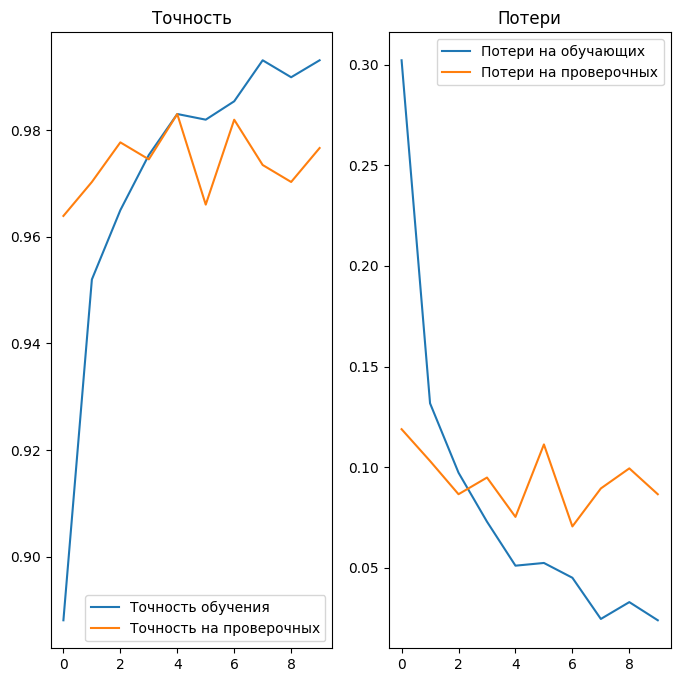

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность обучения')
plt.plot(epochs_range, val_acc, label='Точность на проверочных')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучающих')
plt.plot(epochs_range, val_loss, label='Потери на проверочных')
plt.legend(loc='upper right')
plt.title('Потери')
plt.show()

Проверка на проверочной выборке

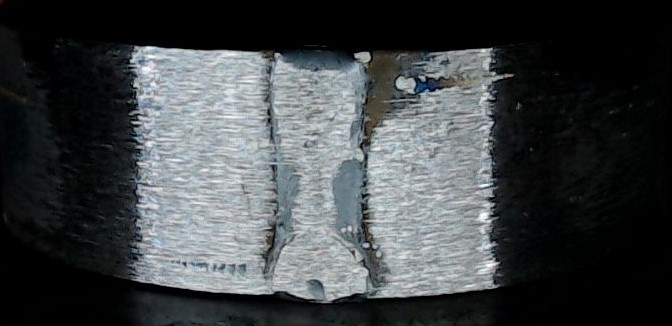

In [ ]:
selected_class = 'shov'
test_img = list(data_dir.glob(f'{selected_class}/*'))[35]
PIL.Image.open(str(test_img))

In [ ]:
img = tf.keras.utils.load_img(test_img, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("Изображение более всего наиболее напоминает класс {} с вероятностью {:.2f} %"
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Изображение более всего наиболее напоминает класс shov с вероятностью 100.00 %


In [ ]:
pd.DataFrame({'cls':class_names,'sc':score})

,cls,sc
0,bok,6.528032e-11
1,centr,2.638403e-11
2,noshov,2.761116e-05
3,shov,9.999723e-01


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
  ]
)

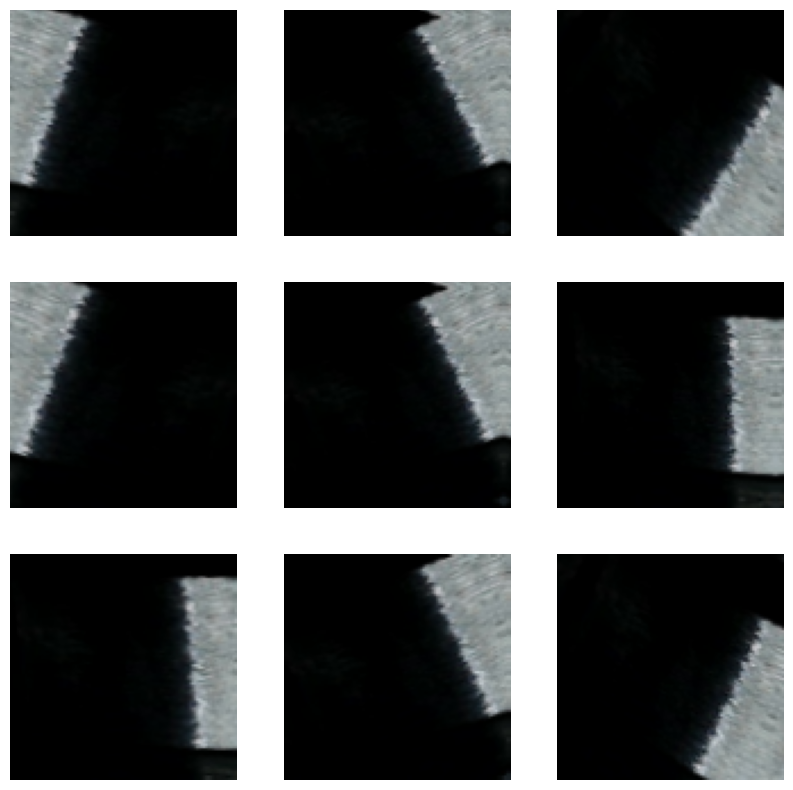

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
backend.clear_session()
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 56s 453ms/step - accuracy: 0.7335 - loss: 0.6095 - val_accuracy: 0.9352 - val_loss: 0.2310
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 57s 479ms/step - accuracy: 0.9246 - loss: 0.2186 - val_accuracy: 0.9544 - val_loss: 0.1101
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 76s 428ms/step - accuracy: 0.9457 - loss: 0.1472 - val_accuracy: 0.9512 - val_loss: 0.1466
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 416ms/step - accuracy: 0.9377 - loss: 0.1729 - val_accuracy: 0.9522 - val_loss: 0.1375
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 50s 421ms/step - accuracy: 0.9562 - loss: 0.1199 - val_accuracy: 0.9469 - val_loss: 0.1605
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 408ms/step - accuracy: 0.9536 - loss: 0.1172 - val_accuracy: 0.9342 - val_loss: 0.1887
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 51s 432ms/step - accuracy: 0.9534 - loss: 0.1300 - val_accuracy: 0.9671 - val_loss: 0.0891
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 49s 419ms/step - accuracy: 0.9586 - loss: 0

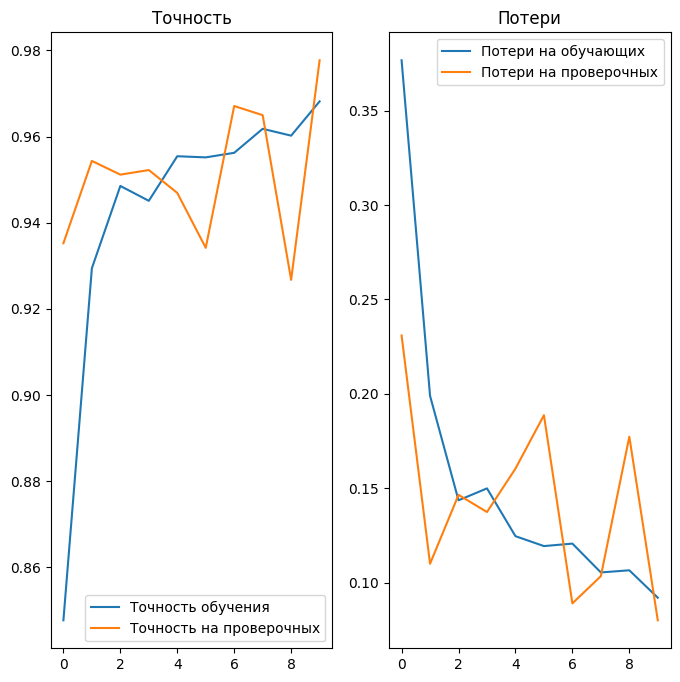

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность обучения')
plt.plot(epochs_range, val_acc, label='Точность на проверочных')
plt.legend(loc='lower right')
plt.title('Точность')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучающих')
plt.plot(epochs_range, val_loss, label='Потери на проверочных')
plt.legend(loc='upper right')
plt.title('Потери')
plt.show()

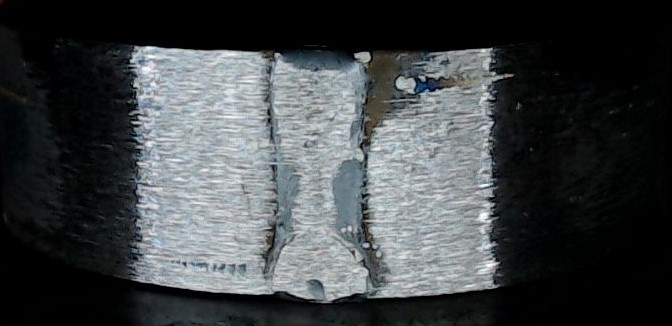

In [ ]:
PIL.Image.open(str(test_img))

Проверка модели

In [ ]:
# flower_url = "https://cdn.publish0x.com/prod/fs/images/62d4ff71f86ed2fb5182d6fffb5605a4be0335db4a866ee20eab2e21dd2bbfe8.jpg"
# flower_path = tf.keras.utils.get_file('flower', origin=flower_url,force_download=True)
# PIL.Image.open(str(flower_path))


In [ ]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "Изображение более всего наиболее напоминает класс {} с вероятностью {:.2f} %"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Изображение более всего наиболее напоминает класс shov с вероятностью 99.99 %


In [ ]:
pd.DataFrame({'cls':class_names,'sc':score})

,cls,sc
0,bok,2.359786e-08
1,centr,1.545008e-06
2,noshov,1.118332e-04
3,shov,9.998866e-01
